https://www.kaggle.com/code/abtabm/alphabet-letter-recognition-emnist-balanced


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from keras.models import Sequential,load_model
import keras

In [2]:
train_images = pd.read_csv("emnist-balanced-train.csv",header=None)
test_images = pd.read_csv("emnist-balanced-test.csv",header=None)
map_images = pd.read_csv("emnist-balanced-mapping.txt",header=None) 
#The 1st row would be treated as header if not set header to none.

## EMNIST-Balanced(Extended MNIST) Dataset CSV Structure :
* Each row represents a single image of shape -> (1,784) There are a total of 784 columns.
* The first column contains the labels for each image 
* **Example** : The 0th row in the above dataframe represents and image the pixel for this image starts from 1st column and the point (1,0) i.e 36 is the label for this image in the 0th column.
* In the map_images.txt file 36 maps to 97 which is ASCII Value for "a".
* 47 Labels in map_images represent digits(0->9),alphabets(A-Z & a,b,d,..t).

In [3]:
train_images

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


a


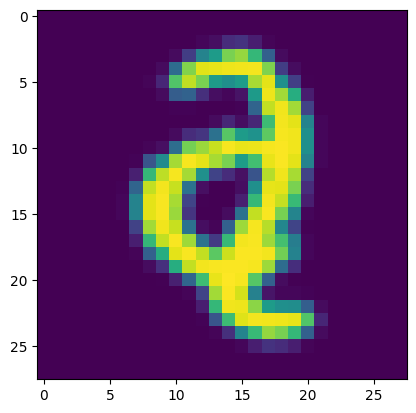

In [4]:
plt.imshow(np.rot90(np.fliplr(train_images.iloc[1,1:].values.reshape(28,28)))) ## We'll learn about this later
print(chr(97)) # 36 in labels column maps to 36 --> 97 in map_images 

## **Data Preprocessing**

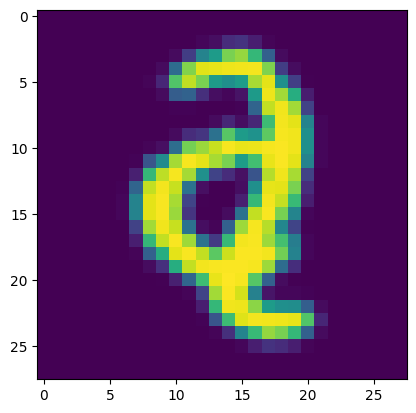

In [5]:
# Seperating labels from features in training and test data.
train_x = train_images.iloc[:,1:]  
train_y = train_images.iloc[:,0]  
train_x = train_x.values

test_x = test_images.iloc[:,1:]
test_y = test_images.iloc[:,0]
test_x = test_x.values

# ascii_map just for the convenince, i've removed the first column in map_images.
# ascii_map sadece kolaylık olsun diye map_images'daki ilk sütunu kaldırdım
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

# Uncomment the below line to know about the labels present in our dataset
# Veri setimizde bulunan etiketler hakkında bilgi edinmek için aşağıdaki yorum satırını kaldırın
# for i in ascii_map: 
#     print(chr(int(i)))
plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))

In [6]:
print(type(ascii_map))

import pandas as pd
df = ascii_map

# DataFrame'i CSV dosyası olarak kaydetme
df.to_csv('ascii_map.csv', index=False)

"""
# Başka bir kod dosyasında CSV dosyasını okuma
df = pd.read_csv('ascii_map.csv')

"""


<class 'list'>


AttributeError: 'list' object has no attribute 'to_csv'

In [7]:
# The images in train_images are not in a proper orientation,hence to make them appropriate for training & testing data.
# train_images içindeki görüntüler uygun bir oryantasyonda değildir, bu nedenle bunları eğitim ve test verileri için uygun hale getirmek gerekir.

def rot_flip(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

(112800, 28, 28)

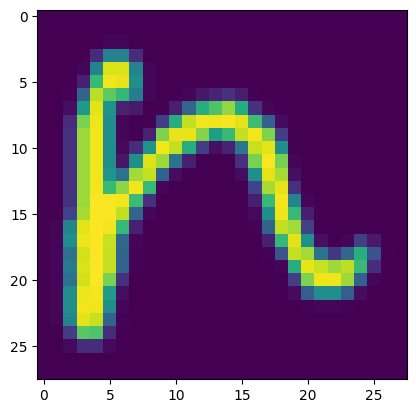

In [8]:
train_x = np.apply_along_axis(rot_flip,1,train_x)
test_x = np.apply_along_axis(rot_flip,1,test_x)
plt.imshow(train_x[2])
train_x.shape

In [9]:
train_x = train_x.astype('float32')
train_x = train_x/255.0

test_x = test_x.astype('float32')
test_x = test_x/255.0

train_x = train_x.reshape(-1, 28,28, 1)   #Equivalent to (112800,28,28,1)
test_x = test_x.reshape(-1, 28,28, 1)   #Equivalent to (18800,28,28,1)

In [38]:
# KAGGLE MODEL
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (28,28,1),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(47,activation='softmax'))

In [10]:
# CNN modeli oluşturma (BİZİM MODEL)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(47, activation='softmax'))


In [11]:
model.compile(optimizer = 'adam',loss= "sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         

In [12]:

from keras.callbacks import EarlyStopping
# Early stopping geri çağrısını oluşturma
early_stopper = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

In [13]:
history = model.fit(
    train_x,
    train_y,
    validation_data = (test_x,test_y),
    epochs = 10, callbacks=[early_stopper]
)

Epoch 1/10


3525/3525 [==============================] - 186s 52ms/step - loss: 1.4683 - accuracy: 0.5545 - val_loss: 0.6113 - val_accuracy: 0.7920
Epoch 2/10
3525/3525 [==============================] - 166s 47ms/step - loss: 0.6710 - accuracy: 0.7846 - val_loss: 0.5072 - val_accuracy: 0.8306
Epoch 3/10
3525/3525 [==============================] - 179s 51ms/step - loss: 0.5805 - accuracy: 0.8144 - val_loss: 0.4747 - val_accuracy: 0.8435
Epoch 4/10
3525/3525 [==============================] - 163s 46ms/step - loss: 0.5317 - accuracy: 0.8300 - val_loss: 0.4408 - val_accuracy: 0.8530
Epoch 5/10
3525/3525 [==============================] - 209s 59ms/step - loss: 0.5092 - accuracy: 0.8366 - val_loss: 0.4199 - val_accuracy: 0.8567
Epoch 6/10
3525/3525 [==============================] - 202s 57ms/step - loss: 0.4810 - accuracy: 0.8452 - val_loss: 0.4407 - val_accuracy: 0.8594
Epoch 7/10
3525/3525 [==============================] - 219s 62ms/step - loss: 0.4711 - accuracy: 0.8473 - val_loss:

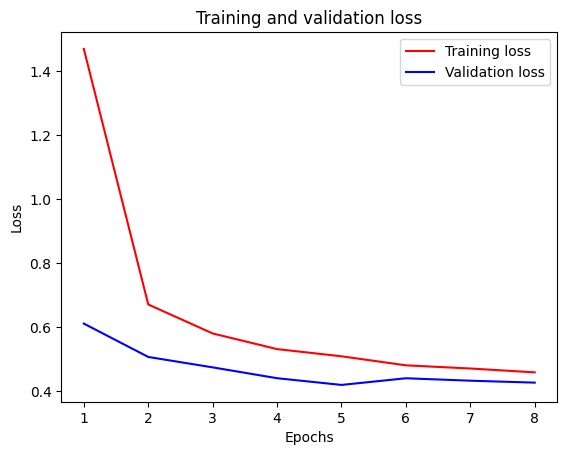

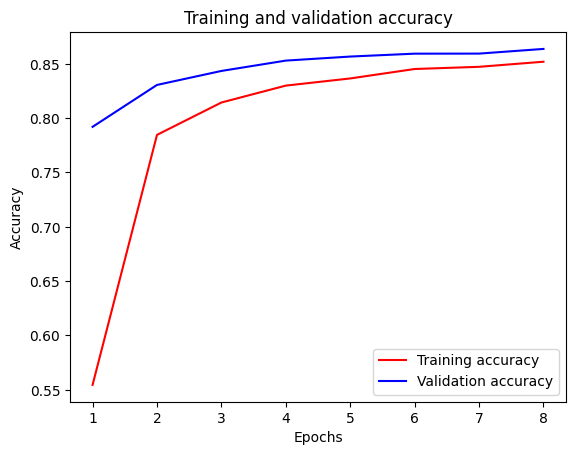

In [14]:
import matplotlib.pyplot as plt

# Loss ve accuracy değerlerini al
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Loss grafiği
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy grafiği
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [19]:
model.save("model1.h5")

c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])


# Adding character to associated ASCII Value
character = []
for i in ascii_map:
    character.append(chr(int(i)))
# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))
character = pd.DataFrame(character)

In [17]:
ascii_map = pd.DataFrame(ascii_map)
ascii_map["Character"] = character
ascii_map.to_csv("mapping.csv",index=False,header=True)

1/1 [==============================] - 0s 37ms/step


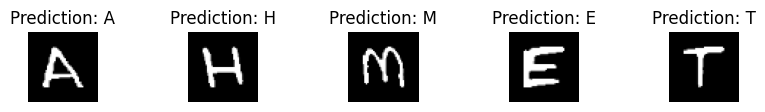

In [18]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Örnek bir model ve ascii_map varsayılan olarak tanımlanmış gibi kabul edilecektir.
# Modelin ve ascii_map'in gerçek değerleri kodunuzda tanımlanmış olmalıdır.


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28))
    x = image.img_to_array(img)
    x = x / 255.0

    gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray_image = np.expand_dims(gray_image, axis=-1)
    gray_image = np.expand_dims(gray_image, axis=0)
    cl = model.predict(gray_image)
    cl = list(cl[0])

    return ascii_map["Character"][cl.index(max(cl))]

# Tahmin edilecek resimlerin listesi
#image_paths = ["test_veri/kucuk_a.png", "test_veri/kucuk_b.png", "test_veri/kucuk_e.png", "test_veri/kucuk_f.png", "test_veri/kucuk_g.PNG", "test_veri/kucuk_h.png", "test_veri/kucuk_k.PNG", "test_veri/kucuk_w.PNG", "test_veri/kucuk_y.PNG" , "test_veri/kucuk_z.png" ]
#image_paths = ["1.PNG", "2.PNG", "3.PNG", "4.PNG", "5.PNG", "6.PNG", "7.PNG", "8.PNG", ]
image_paths = ["4.PNG", "5.PNG", "6.PNG", "7.PNG", "8.PNG"]
# Tüm resimleri yan yana göstermek için subplot kullanalım
plt.figure(figsize=(len(image_paths) * 2, 2))
for i, image_path in enumerate(image_paths):
    plt.subplot(2, len(image_paths), i + 1)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predict_image(image_path)}")
    plt.axis('off')

plt.show()


(28, 28, 3)
1/1 [==============================] - 0s 384ms/step
Prediction :  8


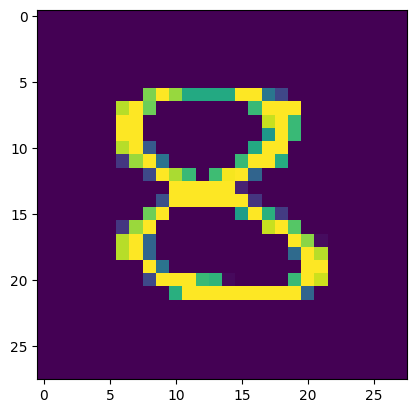

In [19]:
from keras.preprocessing import image
import cv2

img_sh_lst = []
img = image.load_img("test_veri/888.png",target_size=(28,28))
x = image.img_to_array(img)
print(x.shape)
x = x/255.0

gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
gray_image = np.expand_dims(gray_image, axis=-1)
plt.imshow(gray_image)
gray_image = np.expand_dims(gray_image, axis=0)
cl = model.predict(gray_image)
cl = list(cl[0])

print("Prediction : ",ascii_map["Character"][cl.index(max(cl))])


1/1 [==============================] - 0s 30ms/step


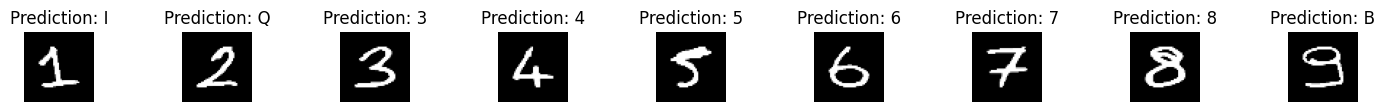

In [25]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Örnek bir model ve ascii_map varsayılan olarak tanımlanmış gibi kabul edilecektir.
# Modelin ve ascii_map'in gerçek değerleri kodunuzda tanımlanmış olmalıdır.


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28))
    x = image.img_to_array(img)
    x = x / 255.0

    gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray_image = np.expand_dims(gray_image, axis=-1)
    gray_image = np.expand_dims(gray_image, axis=0)
    cl = model.predict(gray_image)
    cl = list(cl[0])

    return ascii_map["Character"][cl.index(max(cl))]

# Tahmin edilecek resimlerin listesi
image_paths = ["test_veri/1.png", "test_veri/2.png", "test_veri/3.png", "test_veri/4.png", "test_veri/5.png", "test_veri/6.png", "test_veri/7.png", "test_veri/8.png", "test_veri/9.png",]

# Tüm resimleri yan yana göstermek için subplot kullanalım
plt.figure(figsize=(len(image_paths) * 2, 2))
for i, image_path in enumerate(image_paths):
    plt.subplot(2, len(image_paths), i + 1)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predict_image(image_path)}")
    plt.axis('off')

plt.show()


1/1 [==============================] - 0s 32ms/step


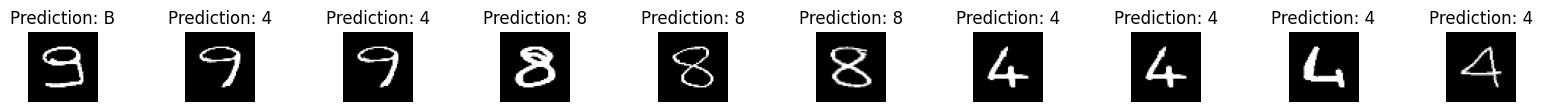

In [26]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Örnek bir model ve ascii_map varsayılan olarak tanımlanmış gibi kabul edilecektir.
# Modelin ve ascii_map'in gerçek değerleri kodunuzda tanımlanmış olmalıdır.


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28))
    x = image.img_to_array(img)
    x = x / 255.0

    gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray_image = np.expand_dims(gray_image, axis=-1)
    gray_image = np.expand_dims(gray_image, axis=0)
    cl = model.predict(gray_image)
    cl = list(cl[0])

    return ascii_map["Character"][cl.index(max(cl))]

# Tahmin edilecek resimlerin listesi
image_paths = ["test_veri/9.png", "test_veri/99.png", "test_veri/99.png", "test_veri/8.png", "test_veri/88.png", "test_veri/888.png", "test_veri/4.png", "test_veri/4.png", "test_veri/444.png", "test_veri/4444.png"]

# Tüm resimleri yan yana göstermek için subplot kullanalım
plt.figure(figsize=(len(image_paths) * 2, 2))
for i, image_path in enumerate(image_paths):
    plt.subplot(2, len(image_paths), i + 1)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predict_image(image_path)}")
    plt.axis('off')

plt.show()


1/1 [==============================] - 0s 27ms/step


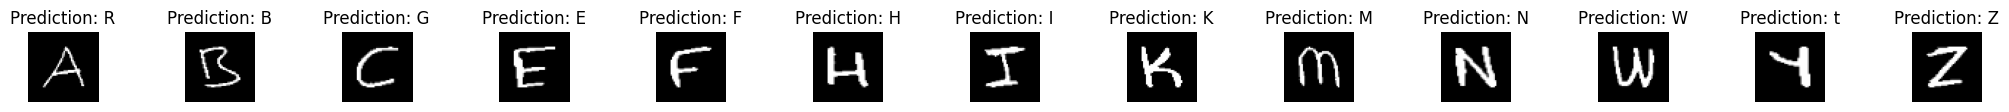

In [27]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Örnek bir model ve ascii_map varsayılan olarak tanımlanmış gibi kabul edilecektir.
# Modelin ve ascii_map'in gerçek değerleri kodunuzda tanımlanmış olmalıdır.


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28))
    x = image.img_to_array(img)
    x = x / 255.0

    gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray_image = np.expand_dims(gray_image, axis=-1)
    gray_image = np.expand_dims(gray_image, axis=0)
    cl = model.predict(gray_image)
    cl = list(cl[0])

    return ascii_map["Character"][cl.index(max(cl))]

# Tahmin edilecek resimlerin listesi
image_paths = ["test_veri/A.png", "test_veri/B.png", "test_veri/C.png", "test_veri/E.png", "test_veri/F.png", "test_veri/H.png", "test_veri/I.png", "test_veri/K.png", "test_veri/M.png", "test_veri/N.png", "test_veri/W.png", "test_veri/Y.png", "test_veri/Z.png" ]

# Tüm resimleri yan yana göstermek için subplot kullanalım
plt.figure(figsize=(len(image_paths) * 2, 2))
for i, image_path in enumerate(image_paths):
    plt.subplot(2, len(image_paths), i + 1)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predict_image(image_path)}")
    plt.axis('off')

plt.show()


1/1 [==============================] - 0s 50ms/step


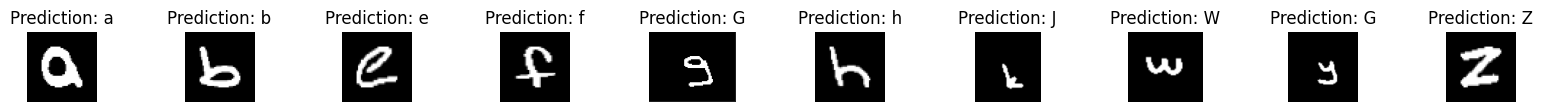

In [23]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Örnek bir model ve ascii_map varsayılan olarak tanımlanmış gibi kabul edilecektir.
# Modelin ve ascii_map'in gerçek değerleri kodunuzda tanımlanmış olmalıdır.


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28))
    x = image.img_to_array(img)
    x = x / 255.0

    gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray_image = np.expand_dims(gray_image, axis=-1)
    gray_image = np.expand_dims(gray_image, axis=0)
    cl = model.predict(gray_image)
    cl = list(cl[0])

    return ascii_map["Character"][cl.index(max(cl))]

# Tahmin edilecek resimlerin listesi
image_paths = ["test_veri/kucuk_a.png", "test_veri/kucuk_b.png", "test_veri/kucuk_e.png", "test_veri/kucuk_f.png", "test_veri/kucuk_g.PNG", "test_veri/kucuk_h.png", "test_veri/kucuk_k.PNG", "test_veri/kucuk_w.PNG", "test_veri/kucuk_y.PNG" , "test_veri/kucuk_z.png" ]

# Tüm resimleri yan yana göstermek için subplot kullanalım
plt.figure(figsize=(len(image_paths) * 2, 2))
for i, image_path in enumerate(image_paths):
    plt.subplot(2, len(image_paths), i + 1)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predict_image(image_path)}")
    plt.axis('off')

plt.show()


In [75]:
print(tf.__version__)

2.15.0
